In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("water quality prediction.csv") 

In [3]:
X = df.drop("Potability", axis=1)
y = df["Potability"]

In [4]:
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [8]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [9]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [10]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Classification Report:")
    print(classification_report(y_true, y_pred))
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [11]:
evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("Support Vector Machine", y_test, svm_preds)
evaluate_model("Random Forest", y_test, rf_preds)


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       412
           1       0.44      0.51      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656

Decision Tree Confusion Matrix:
[[255 157]
 [120 124]]

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       412
           1       0.69      0.32      0.44       244

    accuracy                           0.70       656
   macro avg       0.69      0.62      0.62       656
weighted avg       0.69      0.70      0.66       656

Support Vector Machine Confusion Matrix:
[[377  35]
 [165  79]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77      

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [13]:
model_names = ['Decision Tree', 'SVM', 'Random Forest']
predictions = [dt_preds, svm_preds, rf_preds]
accuracies = [accuracy_score(y_test, pred) for pred in predictions]

In [15]:
import pandas as pd

In [16]:
accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

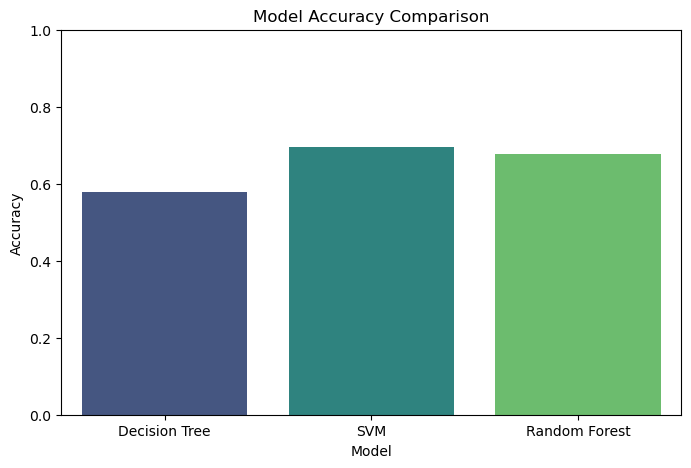

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(data=accuracy_df, x='Model', y='Accuracy', hue='Model', palette='viridis', legend=False)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()